In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144542 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.18-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.18-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.18-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
!ls drive

ls: cannot access 'drive': No such file or directory


In [4]:
import os
os.chdir("/content/drive/My Drive/AutoEncoders/mnist_Autoencoder")
!pwd

/content/drive/My Drive/AutoEncoders/mnist_Autoencoder


In [5]:
!ls

ann_AE_mnist.ipynb
autoencoder_activity_regularizer_eklenmis.h5
CNN_Autoencoder.ipynb
mnist_deep_AE.h5
mnist_deep_Autoencoder_uygulama.ipynb
regularizer_added_AE_mnist.ipynb


In [0]:
!pip install -q keras

In [7]:
#mümkün olan en basit autoencoder oluşturumu
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32                                             # 32 floats -> compression of factor 24.5, assuming the input is 784 floats 
                                                              # this is the size of our encoded representations(kodlanmış gösterimin boytuları)

input_img = Input(shape=(784,))                               # this is our input placeholder

encoded = Dense(encoding_dim, activation='relu')(input_img)   # "encoded" is the encoded representation of the input

decoded = Dense(784, activation='sigmoid')(encoded)           # "decoded" is the lossy reconstruction of the input (girdinin kayıplı yeniden yapılandırmasıdır çünkü encoderla bazı bilgiler gitti)

autoencoder = Model(input_img, decoded)                       # this model maps an input to its reconstruction (bu model girişi yeniden yapılandırmasıyla eşleştirir)
                                                              #yani modelin girişi artık inpu_img , çıkışı da decoded olacak dedik



Using TensorFlow backend.


In [0]:
#ayrı olarak encoder modeli de oluşturumu
encoder = Model(input_img, encoded) # encoder modeli ,mputimg den vbaşlar  encoded sinir katmanına ver dedik


In [0]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1] #autoencoderın son katmanını el diyor
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [10]:
#Şimdi otomatik kodlayıcımızı MNIST rakamlarını yeniden oluşturmak için eğitelim.

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy') #opitimizer olarak adadelta loss fonksiyonu olarak da binarycrossentropi seçildi



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [12]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [13]:
hist=autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/200





60000/60000 [==============================] - 9s 154us/step - loss: 0.3565 - val_loss: 0.2701
Epoch 2/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.2614 - val_loss: 0.2493
Epoch 3/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.2391 - val_loss: 0.2273
Epoch 4/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.2204 - val_loss: 0.2111
Epoch 5/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.2067 - val_loss: 0.1997
Epoch 6/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1963 - val_loss: 0.1903
Epoch 7/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.1880 - val_loss: 0.1828
Epoch 8/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1809 - val_loss: 0.1763
Epoch 9/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1747 - val_

In [0]:
autoencoder.save_weights("ann_AE_mnist.h5")

In [15]:
print(hist.history.keys())

dict_keys(['val_loss', 'loss'])


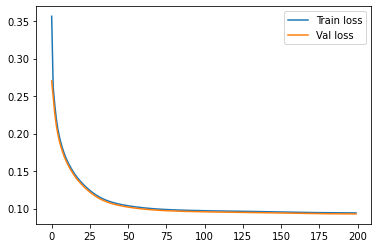

In [16]:
import matplotlib.pyplot as plt 
plt.plot(hist.history["loss"],label="Train loss")
plt.plot(hist.history["val_loss"],label="Val loss")
plt.legend()# labelların gözükmesini sağlamak
plt.show()

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

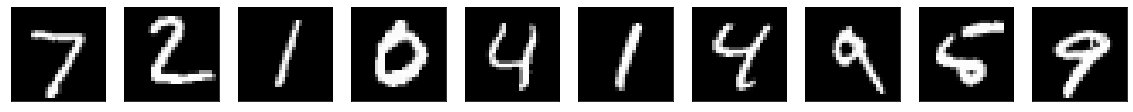

In [29]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

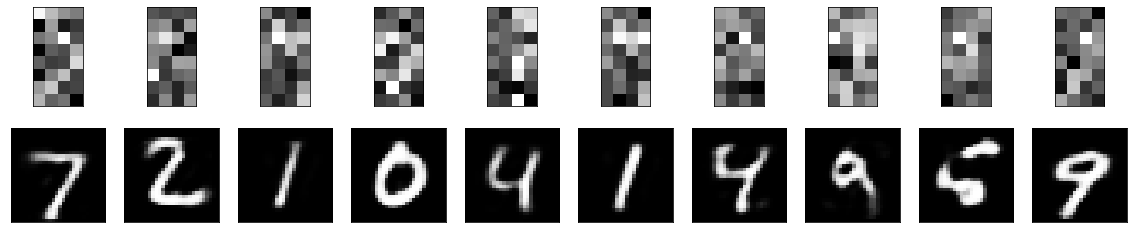

In [28]:
# use Matplotlib (don't ask)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()